In [1]:
#Data import and set up

import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None

YEAR = 2003

StaphAureuaDataPath = '/project/biocomplexity/anil/AMR/StaphAureusAntibiogramTimeSpace/RawData/StaphAureua{}.csv'.format(YEAR)
hsaRegionDataPath = '/home/uzn2up/crosswalks/ZipHsaHrr{}.xls'.format(YEAR)

StaphAureuaData = pd.read_csv(StaphAureuaDataPath)
hsaRegionData = pd.read_excel(hsaRegionDataPath)

In [3]:
StaphAureuaData.columns

Index(['Organism', 'PatientAge', 'PatientGender', 'PatientLocation', 'Region',
       'State', 'Zipcode', 'SpecimenSource', 'SpecimenSourceCategory',
       'ReportDate', 'Amoxicillin/clavulanate', 'Ampicillin',
       'Ampicillin/sulbactam', 'Cefazolin', 'Ceftriaxone', 'Chloramphenicol',
       'Ciprofloxacin', 'Clindamycin', 'Erythromycin', 'Gentamicin',
       'Imipenem', 'Levofloxacin', 'Linezolid', 'Moxifloxacin',
       'Nitrofurantoin', 'Oxacillin', 'Penicillin',
       'Quinupristin/dalfopristin', 'Rifampin (Rifampicin)', 'Tetracycline',
       'Trimeth/sulfa', 'Vancomycin'],
      dtype='object')

In [21]:
list = []
for idx, state in enumerate(hsaRegionData.hsastate):
    if(state == "VA"):
        list.append(hsaRegionData.hrrcity[idx])

In [20]:
hsaRegionData.head()

,zipcode99,hsanum,hsacity,hsastate,hrrnum,hrrcity,hrrstate
0,210,30022,Portsmouth,NH,282,Manchester,NH
1,211,30022,Portsmouth,NH,282,Manchester,NH
2,212,30022,Portsmouth,NH,282,Manchester,NH
3,213,30022,Portsmouth,NH,282,Manchester,NH
4,214,30022,Portsmouth,NH,282,Manchester,NH


In [6]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
StaphAureuaData.head()

,Organism,PatientAge,PatientGender,PatientLocation,Region,State,Zipcode,SpecimenSource,SpecimenSourceCategory,ReportDate,Amoxicillin/clavulanate,Ampicillin,Ampicillin/sulbactam,Cefazolin,Ceftriaxone,Chloramphenicol,Ciprofloxacin,Clindamycin,Erythromycin,Gentamicin,Imipenem,Levofloxacin,Linezolid,Moxifloxacin,Nitrofurantoin,Oxacillin,Penicillin,Quinupristin/dalfopristin,Rifampin (Rifampicin),Tetracycline,Trimeth/sulfa,Vancomycin
0,Staphylococcus aureus,66,M,Inpatient,MID ATLANTIC,New Jersey,8053.0,Sputum,Respiratory-Lower,2006-01-05,NaN,NaN,R,R,NaN,NaN,NaN,R,R,S,NaN,R,S,R,S,R,R,NaN,S,S,S,S
1,Staphylococcus aureus,40,M,Outpatient,MID ATLANTIC,New Jersey,8060.0,Cyst,Wound,2006-01-14,NaN,NaN,R,R,NaN,NaN,NaN,S,R,S,NaN,R,S,I,S,R,R,NaN,S,S,S,S
2,Staphylococcus aureus,49,F,Outpatient,MID ATLANTIC,New Jersey,8060.0,Wound - Unspecified,Wound,2006-01-11,NaN,NaN,S,S,NaN,NaN,NaN,S,S,S,NaN,S,S,S,S,S,R,NaN,S,S,S,S
3,Staphylococcus aureus,14,F,Inpatient,SOUTH ATLANTIC,Florida,33115.0,Abscess,Wound,2006-01-29,R,R,NaN,R,NaN,NaN,S,S,R,S,R,S,S,NaN,NaN,R,R,S,S,NaN,S,S
4,Staphylococcus aureus,62,M,Inpatient,PACIFIC,California,94203.0,Pleural Fluid,Respiratory-Lower,2006-01-31,NaN,NaN,NaN,NaN,NaN,S,NaN,S,S,S,NaN,S,NaN,S,NaN,S,R,S,S,S,S,S


In [61]:
StaphAureuaData.Region.unique()

array(['SOUTH ATLANTIC', 'PACIFIC', 'MOUNTAIN', 'EAST NORTH CENTRAL',
       'WEST SOUTH CENTRAL', 'MID ATLANTIC', 'EAST SOUTH CENTRAL',
       'WEST NORTH CENTRAL', 'NEW ENGLAND'], dtype=object)

In [108]:
StaphAureuaDataNewEngland = StaphAureuaData.loc[StaphAureuaData['Region'] == 'NEW ENGLAND']

In [109]:
StaphAureuaDataNewEnglandMRSA = StaphAureuaDataNewEngland.loc[StaphAureuaDataNewEngland['Oxacillin'] == 'R']
StaphAureuaDataNewEnglandMSSA = StaphAureuaDataNewEngland.loc[StaphAureuaDataNewEngland['Oxacillin'] == 'S']

In [110]:
StaphAureuaDataNewEnglandMSSA

,Organism,PatientAge,PatientGender,PatientLocation,Region,State,Zipcode,SpecimenSource,SpecimenSourceCategory,ReportDate,...,Linezolid,Moxifloxacin,Nitrofurantoin,Oxacillin,Penicillin,Quinupristin/dalfopristin,Rifampin (Rifampicin),Tetracycline,Trimeth/sulfa,Vancomycin
320,Staphylococcus aureus,22,M,Inpatient,NEW ENGLAND,Vermont,5401.0,Biopsy / Tissue,Wound,2003-01-07,...,NaN,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN,S
513,Staphylococcus aureus,44,M,Inpatient,NEW ENGLAND,Vermont,5401.0,Sputum,Respiratory-Lower,2003-01-13,...,NaN,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN,S
514,Staphylococcus aureus,70,F,Inpatient,NEW ENGLAND,Vermont,5401.0,Nose,Respiratory-Upper,2003-01-14,...,NaN,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN,S
796,Staphylococcus aureus,58,F,Inpatient,NEW ENGLAND,Vermont,5401.0,Sputum,Respiratory-Lower,2003-01-20,...,NaN,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN,S
797,Staphylococcus aureus,45,M,Outpatient,NEW ENGLAND,Vermont,5401.0,Surgical Wound,Wound,2003-01-19,...,NaN,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181564,Staphylococcus aureus,38,M,Inpatient,NEW ENGLAND,Vermont,5401.0,Aspirate,Wound,2003-03-09,...,NaN,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN,S
181565,Staphylococcus aureus,26,F,Outpatient,NEW ENGLAND,Vermont,5401.0,Breast,Wound,2003-03-06,...,NaN,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN,S
181662,Staphylococcus aureus,55,F,Inpatient,NEW ENGLAND,Vermont,5401.0,Abscess,Wound,2003-01-06,...,NaN,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN,S
181791,Staphylococcus aureus,56,F,Inpatient - ICU,NEW ENGLAND,Massachusetts,1803.0,Tracheal Aspirate,Respiratory-Lower,2003-01-14,...,S,NaN,S,S,R,NaN,S,S,S,S


In [104]:
hsaRegionData['cityAndState'] = hsaRegionData['hsacity'] +' '+ hsaRegionData['hsastate']

hsaDirectoryNew = {}
for ind in hsaRegionData.index:
    hsaDirectoryNew[hsaRegionData['zipcode03'][ind]] = hsaRegionData['cityAndState'][ind]

In [111]:
StaphAureuaDataNewEnglandMRSA["HSA_REGION"] = pd.NaT
StaphAureuaDataNewEnglandMRSA["lat"] = pd.NaT
StaphAureuaDataNewEnglandMRSA["lon"] = pd.NaT

StaphAureuaDataNewEnglandMSSA["HSA_REGION"] = pd.NaT
StaphAureuaDataNewEnglandMSSA["lat"] = pd.NaT
StaphAureuaDataNewEnglandMSSA["lon"] = pd.NaT

for ind in StaphAureuaDataNewEnglandMRSA.index:
    curZip = StaphAureuaDataNewEnglandMRSA['Zipcode'][ind]
    region = hsaDirectoryNew.get(curZip)
    StaphAureuaDataNewEnglandMRSA['HSA_REGION'][ind] = region
StaphAureuaDataNewEnglandMRSA = StaphAureuaDataNewEnglandMRSA.reset_index()

In [112]:
StaphAureuaDataNewEnglandMSSA

,Organism,PatientAge,PatientGender,PatientLocation,Region,State,Zipcode,SpecimenSource,SpecimenSourceCategory,ReportDate,...,Oxacillin,Penicillin,Quinupristin/dalfopristin,Rifampin (Rifampicin),Tetracycline,Trimeth/sulfa,Vancomycin,HSA_REGION,lat,lon
320,Staphylococcus aureus,22,M,Inpatient,NEW ENGLAND,Vermont,5401.0,Biopsy / Tissue,Wound,2003-01-07,...,S,NaN,NaN,NaN,NaN,NaN,S,NaT,NaT,NaT
513,Staphylococcus aureus,44,M,Inpatient,NEW ENGLAND,Vermont,5401.0,Sputum,Respiratory-Lower,2003-01-13,...,S,NaN,NaN,NaN,NaN,NaN,S,NaT,NaT,NaT
514,Staphylococcus aureus,70,F,Inpatient,NEW ENGLAND,Vermont,5401.0,Nose,Respiratory-Upper,2003-01-14,...,S,NaN,NaN,NaN,NaN,NaN,S,NaT,NaT,NaT
796,Staphylococcus aureus,58,F,Inpatient,NEW ENGLAND,Vermont,5401.0,Sputum,Respiratory-Lower,2003-01-20,...,S,NaN,NaN,NaN,NaN,NaN,S,NaT,NaT,NaT
797,Staphylococcus aureus,45,M,Outpatient,NEW ENGLAND,Vermont,5401.0,Surgical Wound,Wound,2003-01-19,...,S,NaN,NaN,NaN,NaN,NaN,S,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181564,Staphylococcus aureus,38,M,Inpatient,NEW ENGLAND,Vermont,5401.0,Aspirate,Wound,2003-03-09,...,S,NaN,NaN,NaN,NaN,NaN,S,NaT,NaT,NaT
181565,Staphylococcus aureus,26,F,Outpatient,NEW ENGLAND,Vermont,5401.0,Breast,Wound,2003-03-06,...,S,NaN,NaN,NaN,NaN,NaN,S,NaT,NaT,NaT
181662,Staphylococcus aureus,55,F,Inpatient,NEW ENGLAND,Vermont,5401.0,Abscess,Wound,2003-01-06,...,S,NaN,NaN,NaN,NaN,NaN,S,NaT,NaT,NaT
181791,Staphylococcus aureus,56,F,Inpatient - ICU,NEW ENGLAND,Massachusetts,1803.0,Tracheal Aspirate,Respiratory-Lower,2003-01-14,...,S,R,NaN,S,S,S,S,NaT,NaT,NaT


In [93]:
import pgeocode
nomi = pgeocode.Nominatim('us')
nomi.query_postal_code("05401")

postal_code            05401
country_code              US
place_name        Burlington
state_name           Vermont
state_code                VT
county_name       Chittenden
county_code                7
community_name           NaN
community_code           NaN
latitude              44.484
longitude           -73.2199
accuracy                   4
Name: 0, dtype: object

In [96]:
StaphAureuaDataNewEnglandMRSA['Zipcode'] = StaphAureuaDataNewEnglandMRSA['Zipcode'].astype('string')

In [115]:
StaphAureuaDataNewEnglandMSSA['Zipcode'] = StaphAureuaDataNewEnglandMSSA['Zipcode'].astype('int')
StaphAureuaDataNewEnglandMSSA['Zipcode'] = StaphAureuaDataNewEnglandMSSA['Zipcode'].astype('string')
StaphAureuaDataNewEnglandMSSA['Zipcode'] = StaphAureuaDataNewEnglandMSSA['Zipcode'].str.zfill(5)

In [116]:
StaphAureuaDataNewEnglandMSSA

,Organism,PatientAge,PatientGender,PatientLocation,Region,State,Zipcode,SpecimenSource,SpecimenSourceCategory,ReportDate,...,Oxacillin,Penicillin,Quinupristin/dalfopristin,Rifampin (Rifampicin),Tetracycline,Trimeth/sulfa,Vancomycin,HSA_REGION,lat,lon
320,Staphylococcus aureus,22,M,Inpatient,NEW ENGLAND,Vermont,05401,Biopsy / Tissue,Wound,2003-01-07,...,S,NaN,NaN,NaN,NaN,NaN,S,NaT,NaT,NaT
513,Staphylococcus aureus,44,M,Inpatient,NEW ENGLAND,Vermont,05401,Sputum,Respiratory-Lower,2003-01-13,...,S,NaN,NaN,NaN,NaN,NaN,S,NaT,NaT,NaT
514,Staphylococcus aureus,70,F,Inpatient,NEW ENGLAND,Vermont,05401,Nose,Respiratory-Upper,2003-01-14,...,S,NaN,NaN,NaN,NaN,NaN,S,NaT,NaT,NaT
796,Staphylococcus aureus,58,F,Inpatient,NEW ENGLAND,Vermont,05401,Sputum,Respiratory-Lower,2003-01-20,...,S,NaN,NaN,NaN,NaN,NaN,S,NaT,NaT,NaT
797,Staphylococcus aureus,45,M,Outpatient,NEW ENGLAND,Vermont,05401,Surgical Wound,Wound,2003-01-19,...,S,NaN,NaN,NaN,NaN,NaN,S,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181564,Staphylococcus aureus,38,M,Inpatient,NEW ENGLAND,Vermont,05401,Aspirate,Wound,2003-03-09,...,S,NaN,NaN,NaN,NaN,NaN,S,NaT,NaT,NaT
181565,Staphylococcus aureus,26,F,Outpatient,NEW ENGLAND,Vermont,05401,Breast,Wound,2003-03-06,...,S,NaN,NaN,NaN,NaN,NaN,S,NaT,NaT,NaT
181662,Staphylococcus aureus,55,F,Inpatient,NEW ENGLAND,Vermont,05401,Abscess,Wound,2003-01-06,...,S,NaN,NaN,NaN,NaN,NaN,S,NaT,NaT,NaT
181791,Staphylococcus aureus,56,F,Inpatient - ICU,NEW ENGLAND,Massachusetts,01803,Tracheal Aspirate,Respiratory-Lower,2003-01-14,...,S,R,NaN,S,S,S,S,NaT,NaT,NaT


In [99]:
idx = 0
for zipcode in StaphAureuaDataNewEnglandMRSA['Zipcode']:
    lat = nomi.query_postal_code(zipcode).latitude
    long = nomi.query_postal_code(zipcode).longitude

    StaphAureuaDataNewEnglandMRSA['lat'][idx] = lat
    StaphAureuaDataNewEnglandMRSA['lon'][idx] = long
    
    idx = idx + 1

In [117]:
idx = 0
for zipcode in StaphAureuaDataNewEnglandMSSA['Zipcode']:
    lat = nomi.query_postal_code(zipcode).latitude
    long = nomi.query_postal_code(zipcode).longitude

    StaphAureuaDataNewEnglandMSSA['lat'][idx] = lat
    StaphAureuaDataNewEnglandMSSA['lon'][idx] = long
    
    idx = idx + 1


In [118]:
StaphAureuaDataNewEnglandMSSA

,Organism,PatientAge,PatientGender,PatientLocation,Region,State,Zipcode,SpecimenSource,SpecimenSourceCategory,ReportDate,...,Oxacillin,Penicillin,Quinupristin/dalfopristin,Rifampin (Rifampicin),Tetracycline,Trimeth/sulfa,Vancomycin,HSA_REGION,lat,lon
320,Staphylococcus aureus,22,M,Inpatient,NEW ENGLAND,Vermont,05401,Biopsy / Tissue,Wound,2003-01-07,...,S,NaN,NaN,NaN,NaN,NaN,S,NaT,44.8242,-68.7918
513,Staphylococcus aureus,44,M,Inpatient,NEW ENGLAND,Vermont,05401,Sputum,Respiratory-Lower,2003-01-13,...,S,NaN,NaN,NaN,NaN,NaN,S,NaT,42.5089,-71.2004
514,Staphylococcus aureus,70,F,Inpatient,NEW ENGLAND,Vermont,05401,Nose,Respiratory-Upper,2003-01-14,...,S,NaN,NaN,NaN,NaN,NaN,S,NaT,42.5089,-71.2004
796,Staphylococcus aureus,58,F,Inpatient,NEW ENGLAND,Vermont,05401,Sputum,Respiratory-Lower,2003-01-20,...,S,NaN,NaN,NaN,NaN,NaN,S,NaT,42.5089,-71.2004
797,Staphylococcus aureus,45,M,Outpatient,NEW ENGLAND,Vermont,05401,Surgical Wound,Wound,2003-01-19,...,S,NaN,NaN,NaN,NaN,NaN,S,NaT,44.8242,-68.7918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181564,Staphylococcus aureus,38,M,Inpatient,NEW ENGLAND,Vermont,05401,Aspirate,Wound,2003-03-09,...,S,NaN,NaN,NaN,NaN,NaN,S,NaT,NaT,NaT
181565,Staphylococcus aureus,26,F,Outpatient,NEW ENGLAND,Vermont,05401,Breast,Wound,2003-03-06,...,S,NaN,NaN,NaN,NaN,NaN,S,NaT,NaT,NaT
181662,Staphylococcus aureus,55,F,Inpatient,NEW ENGLAND,Vermont,05401,Abscess,Wound,2003-01-06,...,S,NaN,NaN,NaN,NaN,NaN,S,NaT,NaT,NaT
181791,Staphylococcus aureus,56,F,Inpatient - ICU,NEW ENGLAND,Massachusetts,01803,Tracheal Aspirate,Respiratory-Lower,2003-01-14,...,S,R,NaN,S,S,S,S,NaT,NaT,NaT


In [39]:
geoDf = pd.read_csv('geospatialRegions')


0   -98.495141
Name: long, dtype: float64

In [54]:
idx = 0
for region in StaphAureuaDataNewEnglandMRSA['HSA_REGION']:
    lat = geoDf.loc[geoDf['Region'] == region]['lat'].item()
    long = geoDf.loc[geoDf['Region'] == region]['long'].item()

    StaphAureuaDataNewEnglandMRSA['lat'][idx] = lat
    StaphAureuaDataNewEnglandMRSA['lon'][idx] = long
    
    idx = idx + 1

In [55]:
StaphAureuaDataNewEnglandMRSA

,index,Organism,PatientAge,PatientGender,PatientLocation,Region,State,Zipcode,SpecimenSource,SpecimenSourceCategory,...,Oxacillin,Penicillin,Quinupristin/dalfopristin,Rifampin (Rifampicin),Tetracycline,Trimeth/sulfa,Vancomycin,HSA_REGION,lat,lon
0,780,Staphylococcus aureus,46,M,Inpatient,NEW ENGLAND,Vermont,5401.0,Biopsy / Tissue,Wound,...,R,NaN,NaN,NaN,NaN,NaN,S,Burlington VT,44.4762,-73.2129
1,876,Staphylococcus aureus,77,M,Inpatient,NEW ENGLAND,Vermont,5401.0,Urine,Urine,...,R,NaN,NaN,NaN,NaN,S,S,Burlington VT,44.4762,-73.2129
2,924,Staphylococcus aureus,57,M,Outpatient,NEW ENGLAND,Maine,4401.0,Abdomen,Wound,...,R,R,NaN,NaN,NaN,S,S,Bangor ME,44.8012,-68.7778
3,1074,Staphylococcus aureus,87,M,Inpatient,NEW ENGLAND,Massachusetts,1803.0,Blood,Blood,...,R,R,NaN,S,S,S,S,Burlington MA,44.4762,-73.2129
4,1075,Staphylococcus aureus,73,M,Outpatient,NEW ENGLAND,Massachusetts,1803.0,Wound - Unspecified,Wound,...,R,R,NaN,S,S,S,S,Burlington MA,44.4762,-73.2129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1164,180032,Staphylococcus aureus,48,M,Inpatient,NEW ENGLAND,Maine,4401.0,Sputum,Respiratory-Lower,...,R,R,NaN,NaN,NaN,S,S,Bangor ME,44.8012,-68.7778
1165,180447,Staphylococcus aureus,55,F,Inpatient,NEW ENGLAND,Vermont,5401.0,Wound - Unspecified,Wound,...,R,NaN,NaN,NaN,NaN,NaN,S,Burlington VT,44.4762,-73.2129
1166,181361,Staphylococcus aureus,58,M,Inpatient,NEW ENGLAND,Vermont,5401.0,Nose,Respiratory-Upper,...,R,NaN,NaN,NaN,NaN,NaN,S,Burlington VT,44.4762,-73.2129
1167,181538,Staphylococcus aureus,85,M,Inpatient,NEW ENGLAND,Maine,4401.0,Urine,Urine,...,R,R,NaN,NaN,NaN,S,S,Bangor ME,44.8012,-68.7778


In [23]:
s = set(list)

In [30]:
#Processing zipcode dataset

hsaRegionData['cityAndState'] = hsaRegionData['hsacity'] + hsaRegionData['hsastate']

hsaDirectoryNew = {}
for ind in hsaRegionData.index:
    hsaDirectoryNew[hsaRegionData['zipcode99'][ind]] = hsaRegionData['cityAndState'][ind]

In [24]:
s

{'Arlington',
 'Charlottesville',
 'Durham',
 'Kingsport',
 'Lynchburg',
 'Newport News',
 'Norfolk',
 'Richmond',
 'Roanoke',
 'Winchester',
 'Winston-Salem'}

In [31]:
#Processing Staph Aureua dataset

StaphAureuaData['Zipcode'] = StaphAureuaData['Zipcode'].fillna(0)
StaphAureuaData['Zipcode'] = StaphAureuaData['Zipcode'].astype('int')

StaphAureuaData.drop(['Organism', 'PatientAge', 'PatientGender', 'PatientLocation', 'Region', 'State',
                      'SpecimenSource', 'SpecimenSourceCategory'], axis=1, inplace=True)

StaphAureuaData["HSA_REGION"] = pd.NaT

In [32]:
#Adding the HSA region to Staph Aureua dataset

for ind in StaphAureuaData.index:
    curZip = StaphAureuaData['Zipcode'][ind]
    region = hsaDirectoryNew.get(curZip)
    StaphAureuaData['HSA_REGION'][ind] = region

In [33]:
#Function for: R=1, S/I=0, Leave NaN values

associationDict = {
    'Amoxicillin/clavulanate' : 1,
    'Ampicillin' : 2,
    'Ampicillin/sulbactam' : 3,
    'Cefazolin' : 4, 
    'Ceftriaxone' : 5,
    'Chloramphenicol' : 6,
    'Ciprofloxacin' : 7,
    'Clindamycin' : 8,
    'Erythromycin' : 9,
    'Gentamicin' : 10,
    'Imipenem' : 11,
    'Levofloxacin' : 12,
    'Linezolid' : 13,
    'Moxifloxacin' : 14,
    'Nitrofurantoin' : 15,
    'Oxacillin' : 16,
    'Penicillin' : 17,
    'Quinupristin/dalfopristin' : 18,
    'Rifampin (Rifampicin)' : 19,
    'Tetracycline' : 20,
    'Trimeth/sulfa' : 21,
    'Vancomycin' : 22
}

def normalize(df):
    i = 0
    for column in df.columns[2:24]:
        for item in df[column]:
            if(item == "R"):
                StaphAureuaData[column][i] = associationDict[column]
            if(item == "S" or item == "I"):
                StaphAureuaData[column][i] = ' '
            i=i+1
        i=0

In [34]:
#Note: Takes a few minutes to run

normalize(StaphAureuaData)

In [35]:
#Generates a text file in the format for the Kingfisher Association Rule Mining code

def generateOutputFile(HSA_REGION_NAME):
    
    rslt_df = StaphAureuaData[StaphAureuaData['HSA_REGION'] == HSA_REGION_NAME]
    
    if "/" in HSA_REGION_NAME:
        HSA_REGION_NAME = HSA_REGION_NAME.replace("/", "")
    
    rslt_df.to_csv('temp2/{}{}.csv'.format(HSA_REGION_NAME.replace(" ", ""), YEAR))

    inputFileName = 'temp2/{}{}.txt'.format(HSA_REGION_NAME.replace(" ", ""), YEAR)
    finalName = '{}{}.txt'.format(HSA_REGION_NAME.replace(" ", ""), YEAR)
    outputFileName = '/home/uzn2up/output/output{}/{}'.format(YEAR, finalName)

    with open(inputFileName, 'a') as f:
        outputDf = rslt_df.drop(['Zipcode', 'ReportDate', 'HSA_REGION'], axis=1)
        dfAsString = outputDf.to_string(header=False, index=False, na_rep='')
        f.write(dfAsString)

    with open(inputFileName,'r+') as file:
        for idx, line in enumerate(file):
            if not line.isspace():
                with open(outputFileName,'a') as file2:
                    file2.write(line)
    with open(outputFileName,'a') as file3:
        file3.write('\n')

In [36]:
#Create output file for every region, takes a while to finish running

allRegions = StaphAureuaData['HSA_REGION'].unique()
for idx, region in enumerate(allRegions):
    if(region == None):
        allRegions = np.delete(allRegions, idx)


In [38]:
for region in allRegions:
    generateOutputFile(region)

In [39]:
#A few of the files have an error where the last line is an empty new line and the Kingfisher program does not accept this and
#outputs an error. This function identifes and corrects those files.

def correctNewLine(region):
    with open('/home/uzn2up/output/output{}/{}{}.txt'.format(YEAR , region.replace(" ","") , YEAR) , 'r') as f2:
        tmp = list(f2)
        if tmp[-1] == '\n':
            tmp.pop()
            with open('/home/uzn2up/output/output{}/{}{}.txt'.format(YEAR , region.replace(" ","") , YEAR) , 'w+') as fd:
                fd.seek(0)                  
                fd.truncate()
                for line in tmp:
                    fd.write(line)

In [40]:
for region in allRegions:
    if "/" in region:
        region = region.replace("/", "")
    correctNewLine(region)

In [29]:
hsaRegionData.head()

,zipcode99,hsanum,hsacity,hsastate,hrrnum,hrrcity,hrrstate
0,210,30022,Portsmouth,NH,282,Manchester,NH
1,211,30022,Portsmouth,NH,282,Manchester,NH
2,212,30022,Portsmouth,NH,282,Manchester,NH
3,213,30022,Portsmouth,NH,282,Manchester,NH
4,214,30022,Portsmouth,NH,282,Manchester,NH


In [132]:
allRegions = StaphAureuaData['HSA_REGION'].unique()

In [37]:
allRegions

array(['NaplesFL', 'MesaAZ', 'PhoenixAZ', 'MorgantownWV', 'AlbuquerqueNM',
       'DecaturGA', 'JacksonvilleFL', 'ManhattanNY', 'BirminghamAL',
       'LexingtonKY', 'GalvestonTX', 'ShreveportLA', 'MemphisTN',
       'AtlantaGA', 'AnnapolisMD', 'SacramentoCA', 'Kansas CityMO',
       'ReadingPA', 'LouisvilleKY', 'WichitaKS', 'San DiegoCA',
       'SeattleWA', 'ChicagoIL', 'DetroitMI', 'Las VegasNV', 'PortlandOR',
       'DallasTX', 'Los AlamitosCA', 'MilfordMI', 'Miami BeachFL',
       'MelbourneFL', 'GreensboroNC', 'WashingtonDC', 'Little RockAR',
       'White PlainsNY', 'WorcesterMA', 'IndianapolisIN', 'BurlingtonVT',
       'CharlestonSC', 'Boulder CityNV', 'DenverCO', 'Santa MonicaCA',
       'MiamiFL', 'RochesterNY', 'TacomaWA', 'CamdenNJ', 'ToledoOH',
       'TucsonAZ', 'SodusNY', 'ClevelandOH', 'Los AngelesCA', 'UrbanaIL',
       'La MesaCA', 'Chula VistaCA', 'DurhamNC', 'San AntonioTX',
       'Mayfield HeightsOH', 'RidgewoodNJ', 'SpringfieldIL', 'EuclidOH',
       'SyracuseNY

In [152]:
len(allRegions)

87

In [23]:
len(allRegions)

100

In [25]:
allRegions = np.delete(allRegions, 99)

In [11]:
allRegions

array(['SeattleWA', 'CharlottesvilleVA', 'SyracuseNY', 'DenverCO',
       'Santa MonicaCA', 'LakelandFL', 'ClevelandOH', 'San AntonioTX',
       'HackensackNJ', 'TulsaOK', 'GreensboroNC', 'DetroitMI', 'DallasTX',
       'SouthfieldMI', 'ChicagoIL', 'TacomaWA', 'MelbourneFL', 'MiamiFL',
       'CharlotteNC', 'RaleighNC', 'DanvillePA', 'BirminghamAL',
       'White PlainsNY', 'MemphisTN', 'MesaAZ', 'WashingtonDC',
       'AnnapolisMD', 'Salt Lake CityUT', 'PhoenixAZ', 'DurhamNC',
       'CamdenNJ', 'SacramentoCA', 'Long BeachCA', 'BangorME',
       'ReadingPA', 'SpringfieldIL', 'MadisonWI', 'BurlingtonVT',
       'CharlestonSC', 'DecaturGA', 'AlbuquerqueNM', 'New OrleansLA',
       'ShreveportLA', 'WichitaKS', 'SalemVA', 'Mayfield HeightsOH',
       'EuclidOH', 'LouisvilleKY', 'LubbockTX', 'BurlingtonMA',
       'Wilkes-BarrePA', 'San FranciscoCA', 'HarrisburgPA', 'MunsterIN',
       'Miami BeachFL', 'HoustonTX', 'WilmingtonDE', 'MobileAL',
       'Fort WayneIN', 'RidgewoodNJ', 'Jacksonv

In [16]:
hsaRegionData.head()

,zipcode00,hsanum,hsacity,hsastate,hrrnum,hrrcity,hrrstate
0,210,30022,Portsmouth,NH,282,Manchester,NH
1,211,30022,Portsmouth,NH,282,Manchester,NH
2,212,30022,Portsmouth,NH,282,Manchester,NH
3,213,30022,Portsmouth,NH,282,Manchester,NH
4,214,30022,Portsmouth,NH,282,Manchester,NH


In [45]:
allRegions

array(['San AntonioTX', 'MiamiFL', 'RichlandWA', 'NaplesFL',
       'Wilkes-BarrePA', 'DanvillePA', 'PortlandOR', 'SeattleWA',
       'WichitaKS', 'WorcesterMA', 'PittsburghPA', 'BostonMA',
       'AlbuquerqueNM', 'ProvidenceRI', 'Las VegasNV', 'San FranciscoCA',
       'RaleighNC', 'DetroitMI', 'BurlingtonVT', 'CharlestonSC',
       'JacksonvilleFL', 'RidgewoodNJ', 'OmahaNE', 'NewbergOR',
       'BirminghamAL', 'DecaturGA', 'MelbourneFL', 'Cocoa BeachFL',
       'TavernierFL', 'AlbanyNY', 'Santa MonicaCA', 'EuclidOH',
       'ClevelandOH', 'HoustonTX', 'DallasTX', 'SouthfieldMI',
       'MadisonWI', 'TulsaOK', 'NewportRI', 'ReadingPA', 'AnnapolisMD',
       'MorgantownWV', 'ManhattanNY', 'San DiegoCA', 'GreensboroNC',
       'MonroeNC', 'Fernandina BeachFL', 'ChicagoIL', 'Kings MountainNC',
       'South MiamiFL', 'SacramentoCA', 'St. LouisMO', 'Boulder CityNV',
       'Mayfield HeightsOH', 'DurhamNC', 'KennewickWA', 'Grand RapidsMI',
       'BangorME', 'CharlotteNC', 'Coral GablesFL'

In [48]:
len(allRegions)

114

In [49]:
def generateOutputFileTMP(HSA_REGION_NAME):
    
    if "/" in HSA_REGION_NAME:
        orgHSA_REGION_NAME = HSA_REGION_NAME
        HSA_REGION_NAME = HSA_REGION_NAME.replace("/", "")
    
    rslt_df = StaphAureuaData[StaphAureuaData['HSA_REGION'] == orgHSA_REGION_NAME]
    rslt_df.to_csv('temp2/{}{}.csv'.format(HSA_REGION_NAME.replace(" ", ""), YEAR))

    inputFileName = 'temp2/{}{}.txt'.format(HSA_REGION_NAME.replace(" ", ""), YEAR)
    finalName = '{}{}.txt'.format(HSA_REGION_NAME.replace(" ", ""), YEAR)
    outputFileName = '/home/uzn2up/output/output{}/{}'.format(YEAR, finalName)

    with open(inputFileName, 'a') as f:
        outputDf = rslt_df.drop(['Zipcode', 'ReportDate', 'HSA_REGION'], axis=1)
        dfAsString = outputDf.to_string(header=False, index=False, na_rep='')
        f.write(dfAsString)

    with open(inputFileName,'r+') as file:
        for idx, line in enumerate(file):
            if not line.isspace():
                with open(outputFileName,'a') as file2:
                    file2.write(line)
    with open(outputFileName,'a') as file3:
        file3.write('\n')

In [50]:
generateOutputFileTMP('Tillamook/WheelerOR')

In [51]:
rslt_df.head()

,Zipcode,ReportDate,Amoxicillin/clavulanate,Ampicillin,Ampicillin/sulbactam,Cefazolin,Ceftriaxone,Chloramphenicol,Ciprofloxacin,Clindamycin,...,Moxifloxacin,Nitrofurantoin,Oxacillin,Penicillin,Quinupristin/dalfopristin,Rifampin (Rifampicin),Tetracycline,Trimeth/sulfa,Vancomycin,HSA_REGION
56689,97130,2007-06-29,NaN,NaN,NaN,NaN,NaN,NaN,,,...,,,,17,,,,,,Tillamook/WheelerOR
90814,97130,2007-11-30,NaN,NaN,NaN,NaN,NaN,NaN,7,,...,14,,16,17,,,,,,Tillamook/WheelerOR
102306,97130,2007-05-09,NaN,NaN,NaN,,NaN,NaN,NaN,,...,NaN,,,17,,,,,,Tillamook/WheelerOR
167351,97130,2007-07-19,NaN,NaN,NaN,NaN,NaN,NaN,7,,...,14,,16,17,,,,,,Tillamook/WheelerOR


In [25]:
rslt_df = StaphAureuaData[StaphAureuaData['HSA_REGION'] == 'Tillamook/WheelerOR']

In [31]:
rslt_df.head()

,Zipcode,ReportDate,Amoxicillin/clavulanate,Ampicillin,Ampicillin/sulbactam,Cefazolin,Ceftriaxone,Chloramphenicol,Ciprofloxacin,Clindamycin,...,Moxifloxacin,Nitrofurantoin,Oxacillin,Penicillin,Quinupristin/dalfopristin,Rifampin (Rifampicin),Tetracycline,Trimeth/sulfa,Vancomycin,HSA_REGION
56689,97130,2007-06-29,NaN,NaN,NaN,NaN,NaN,NaN,,,...,,,,17,,,,,,Tillamook/WheelerOR
90814,97130,2007-11-30,NaN,NaN,NaN,NaN,NaN,NaN,7,,...,14,,16,17,,,,,,Tillamook/WheelerOR
102306,97130,2007-05-09,NaN,NaN,NaN,,NaN,NaN,NaN,,...,NaN,,,17,,,,,,Tillamook/WheelerOR
167351,97130,2007-07-19,NaN,NaN,NaN,NaN,NaN,NaN,7,,...,14,,16,17,,,,,,Tillamook/WheelerOR


In [21]:
StaphAureuaData.head()

,Zipcode,ReportDate,Amoxicillin/clavulanate,Ampicillin,Ampicillin/sulbactam,Cefazolin,Ceftriaxone,Chloramphenicol,Ciprofloxacin,Clindamycin,...,Moxifloxacin,Nitrofurantoin,Oxacillin,Penicillin,Quinupristin/dalfopristin,Rifampin (Rifampicin),Tetracycline,Trimeth/sulfa,Vancomycin,HSA_REGION
0,98101,2007-01-12,NaN,NaN,,,NaN,,NaN,,...,,,,17,,,,,,SeattleWA
1,98101,2007-01-19,NaN,NaN,3,4,NaN,,NaN,,...,14,,16,17,,,,,,SeattleWA
2,98101,2007-01-20,NaN,NaN,,,NaN,,NaN,,...,,,,17,,,,,,SeattleWA
3,98101,2007-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,SeattleWA
4,97225,2007-01-03,NaN,NaN,NaN,,NaN,NaN,NaN,,...,NaN,,,17,,,,,,PortlandOR


In [24]:
StaphAureuaData.iloc[56689]

Zipcode                                    97130
ReportDate                            2007-06-29
Amoxicillin/clavulanate                      NaN
Ampicillin                                   NaN
Ampicillin/sulbactam                         NaN
Cefazolin                                    NaN
Ceftriaxone                                  NaN
Chloramphenicol                              NaN
Ciprofloxacin                                   
Clindamycin                                     
Erythromycin                                    
Gentamicin                                      
Imipenem                                     NaN
Levofloxacin                                    
Linezolid                                       
Moxifloxacin                                    
Nitrofurantoin                                  
Oxacillin                                       
Penicillin                                    17
Quinupristin/dalfopristin                       
Rifampin (Rifampicin

In [6]:
import matplotlib.pyplot as plt

In [91]:

years = ["1999" , "2000" , "2001" , "2002" , "2003" , "2004" , "2005" , "2006" , "2007" , "2008" , "2009" , "2010" , "2011" , "2012"]

def plotCount(region):
    if "/" in region:
        region = region.replace("/", "")
    
    count = []
    
    for year in range(1999,2013):
        
        fileName = "temp2/{}{}.csv".format(region.replace(" ",""), year)
        try:
            df = pd.read_csv(fileName)
            l = len(df.index)
            count.append(l)
        except OSError as e:
            count.append(0)
            
    plt.bar(years, count)
    plt.xticks(rotation=90)
    plt.ylabel("Number of antibiogram tests")
    plt.xlabel("Year")
    plt.title(region)
    plt.savefig('plots/{}.png'.format(region.replace(" ","")))
    plt.show()
    
    
    



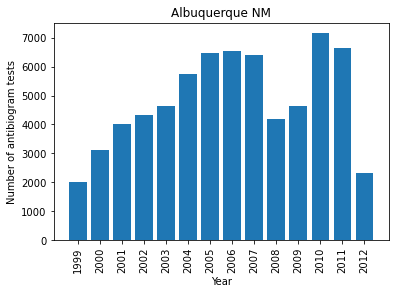

In [65]:
plotCount('Albuquerque NM')

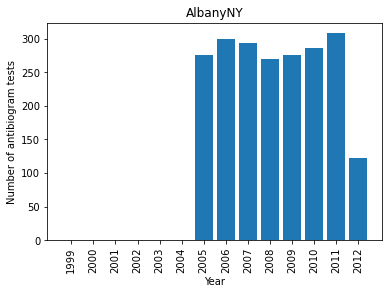

In [55]:
plotCount('AlbanyNY')

In [89]:
myArray = ['San AntonioTX', 'MiamiFL', 'RichlandWA', 'NaplesFL',
       'Wilkes-BarrePA', 'DanvillePA', 'PortlandOR', 'SeattleWA',
       'WichitaKS', 'WorcesterMA', 'PittsburghPA', 'BostonMA',
       'AlbuquerqueNM', 'ProvidenceRI', 'Las VegasNV', 'San FranciscoCA',
       'RaleighNC', 'DetroitMI', 'BurlingtonVT', 'CharlestonSC',
       'JacksonvilleFL', 'RidgewoodNJ', 'OmahaNE', 'NewbergOR',
       'BirminghamAL', 'DecaturGA', 'MelbourneFL', 'Cocoa BeachFL',
       'TavernierFL', 'AlbanyNY', 'Santa MonicaCA', 'EuclidOH',
       'ClevelandOH', 'HoustonTX', 'DallasTX', 'SouthfieldMI',
       'MadisonWI', 'TulsaOK', 'NewportRI', 'ReadingPA', 'AnnapolisMD',
       'MorgantownWV', 'ManhattanNY', 'San DiegoCA', 'GreensboroNC',
       'MonroeNC', 'Fernandina BeachFL', 'ChicagoIL', 'Kings MountainNC',
       'South MiamiFL', 'SacramentoCA', 'St. LouisMO', 'Boulder CityNV',
       'Mayfield HeightsOH', 'DurhamNC', 'KennewickWA', 'Grand RapidsMI',
       'BangorME', 'CharlotteNC', 'Coral GablesFL', 'ShelbyNC',
       'WilmingtonDE', 'MarlboroughMA', 'BethesdaMD', 'Mount HollyNJ',
       'MaryvilleIL', 'PhiladelphiaPA', 'CamdenNJ', 'Takoma ParkMD',
       'RockvilleMD', 'MinneapolisMN', 'AllentownPA', 'BethlehemPA',
       'WashingtonDC', 'SapulpaOK', 'MemphisTN', 'BartlesvilleOK',
       'CoronadoCA', 'La JollaCA', 'Grand ForksND', 'EncinitasCA',
       'TacomaWA', 'ClintonMA', 'ConroeTX', 'MesaAZ', 'PhoenixAZ',
       'CharlottesvilleVA', 'Chula VistaCA', 'EvergreenAL',
       'Long BeachCA', 'Oklahoma CityOK', 'West ChesterPA', 'AlabasterAL',
       'PascoWA', 'Fountain ValleyCA', 'BrownsvilleTN', 'BrocktonMA',
       'VinitaOK', 'BurlingtonMA', 'ShreveportLA', 'Tillamook/WheelerOR',
       'Ann ArborMI', 'New OrleansLA', 'Baton RougeLA', 'FairfaxVA',
       'HawthorneNV', 'HonoluluHI', 'MorgantonNC', 'ValdeseNC',
       'White PlainsNY', 'Port ChesterNY', 'PageAZ', 'SyracuseNY',
       'PocahontasAR', 'AtlantaGA', 'AustellGA' , 'BattleMountainNV' , 'BellinghamWA' ,
        'BemidjiMN' , 'BiloxiMS', 'BuffaloOK' , 'BullheadCityAZ' , 'CarsonCityNV' , 'CartersvilleGA' ,
        'CentreAL' , 'ColumbusGA' , 'CottageGroveOR' , 'CullmanAL' , 'DenverCO' , 'DublinGA' , 'ElPasoTX' ,
        'EnidOK' , 'EugeneOR' , 'FairviewOK' , 'FallonNV' , 'FederalWayWA' , 'FlemingsburgKY' , 'FlorenceOR' ,
        'FortLauderdaleFL' , 'FortPayneAL' , 'FortPierceFL' , 'FortWayneIN' , 'GainesvilleGA' , 'GalvestonTX' , 'HackensackNJ' , 'HarrisburgPA' ,
        'HendersonNV' , 'IndianapolisIN' , 'IowaCityIA' , 'JacksonMS' , 'JasperAL' , 'KansasCityMO' , 'KetchikanAK' ,
        'KnoxvilleTN' , 'LaJollaCA' , 'LakelandFL' , 'LaMesaCA' , 'LasVegasNV' , 'LexingtonKY' , 'LittleRockAR' ,
        'LosAlamitosCA' , 'LosAngelesCA' , 'LouisvilleKY' , 'LubbockTX' , 'MiamiBeachFL' , 'MilfordMI2000' , 'MilwaukeeWI' ,
        'MobileAL' , 'MoultonAL' , 'MountClemensMI' , 'MunsterIN' , 'NapoleonOH' , 'NewarkNJ' , 'NewnanGA' , 'OkeechobeeFL' , 'OkeeneOK' , 'OrlandoFL' , 
        'PembrokePinesFL' , 'PlantationFL' , 'PortSt.LucieFL' , 'RenoNV' , 'RochesterNY' , 'SalemVA' , 'SaltLakeCityUT' , 'SanJoseCA' , 
        'SeasideOR' , 'SeilingOK' , 'SiouxFallsSD' , 'SnellvilleGA' , 'SodusNY' , 'SpartanburgSC' , 'SpringfieldIL' , 'StanfordCA' , 'SylacaugaAL' , 
        'TalladegaAL' , 'ToledoOH' , 'TorranceCA' , 'TruckeeCA' , 'TucsonAZ' , 'UrbanaIL' , 'WinderGA' , 'WinnemuccaNV']

In [ ]:
count = []
    
    for year in range(1999,2013):
        
        fileName = "temp2/{}{}.csv".format(region.replace(" ",""), year)
        try:
            df = pd.read_csv(fileName)
            l = len(df.index)
            count.append(l)
        except OSError as e:
            count.append(0)

In [50]:
pos = range(10,32)
colname = StaphAureuaData.columns[pos]

In [52]:
for i,item in enumerate(colname):
    print("{}. {}".format(i+1 , item))

1. Amoxicillin/clavulanate
2. Ampicillin
3. Ampicillin/sulbactam
4. Cefazolin
5. Ceftriaxone
6. Chloramphenicol
7. Ciprofloxacin
8. Clindamycin
9. Erythromycin
10. Gentamicin
11. Imipenem
12. Levofloxacin
13. Linezolid
14. Moxifloxacin
15. Nitrofurantoin
16. Oxacillin
17. Penicillin
18. Quinupristin/dalfopristin
19. Rifampin (Rifampicin)
20. Tetracycline
21. Trimeth/sulfa
22. Vancomycin


In [43]:
StaphAureuaData.head()

,Organism,PatientAge,PatientGender,PatientLocation,Region,State,Zipcode,SpecimenSource,SpecimenSourceCategory,ReportDate,...,Linezolid,Moxifloxacin,Nitrofurantoin,Oxacillin,Penicillin,Quinupristin/dalfopristin,Rifampin (Rifampicin),Tetracycline,Trimeth/sulfa,Vancomycin
0,Staphylococcus aureus,8,F,Outpatient,SOUTH ATLANTIC,Florida,34101.0,Wound - Unspecified,Wound,1999-01-05,...,NaN,NaN,S,S,NaN,NaN,S,S,S,S
1,Staphylococcus aureus,32,F,Inpatient,SOUTH ATLANTIC,Florida,34101.0,Sputum,Respiratory-Lower,1999-01-04,...,NaN,NaN,S,S,NaN,NaN,S,S,S,S
2,Staphylococcus aureus,68,M,Inpatient,MOUNTAIN,Arizona,85201.0,Sputum,Respiratory-Lower,1999-01-08,...,NaN,NaN,NaN,S,R,NaN,S,S,S,S
3,Staphylococcus aureus,76,M,Inpatient,MOUNTAIN,Arizona,85301.0,Blood,Blood,1999-01-03,...,NaN,NaN,S,R,R,NaN,S,S,R,S
4,Staphylococcus aureus,19,F,Outpatient,SOUTH ATLANTIC,West Virginia,26501.0,Wound - Unspecified,Wound,1999-01-09,...,NaN,NaN,NaN,S,R,NaN,NaN,S,S,S


In [63]:
regionList = ['San AntonioTX', 'MiamiFL', 'RichlandWA', 'NaplesFL',
       'Wilkes-BarrePA', 'DanvillePA', 'PortlandOR', 'SeattleWA',
       'WichitaKS', 'WorcesterMA', 'PittsburghPA', 'BostonMA',
       'AlbuquerqueNM', 'ProvidenceRI', 'Las VegasNV', 'San FranciscoCA',
       'RaleighNC', 'DetroitMI', 'BurlingtonVT', 'CharlestonSC',
       'JacksonvilleFL', 'RidgewoodNJ', 'OmahaNE', 'NewbergOR',
       'BirminghamAL', 'DecaturGA', 'MelbourneFL', 'Cocoa BeachFL',
       'TavernierFL', 'AlbanyNY', 'Santa MonicaCA', 'EuclidOH',
       'ClevelandOH', 'HoustonTX', 'DallasTX', 'SouthfieldMI',
       'MadisonWI', 'TulsaOK', 'NewportRI', 'ReadingPA', 'AnnapolisMD',
       'MorgantownWV', 'ManhattanNY', 'San DiegoCA', 'GreensboroNC',
       'MonroeNC', 'Fernandina BeachFL', 'ChicagoIL', 'Kings MountainNC',
       'South MiamiFL', 'SacramentoCA', 'St. LouisMO', 'Boulder CityNV',
       'Mayfield HeightsOH', 'DurhamNC', 'KennewickWA', 'Grand RapidsMI',
       'BangorME', 'CharlotteNC', 'Coral GablesFL', 'ShelbyNC',
       'WilmingtonDE', 'MarlboroughMA', 'BethesdaMD', 'Mount HollyNJ',
       'MaryvilleIL', 'PhiladelphiaPA', 'CamdenNJ', 'Takoma ParkMD',
       'RockvilleMD', 'MinneapolisMN', 'AllentownPA', 'BethlehemPA',
       'WashingtonDC', 'SapulpaOK', 'MemphisTN', 'BartlesvilleOK',
       'CoronadoCA', 'La JollaCA', 'Grand ForksND', 'EncinitasCA',
       'TacomaWA', 'ClintonMA', 'ConroeTX', 'MesaAZ', 'PhoenixAZ',
       'CharlottesvilleVA', 'Chula VistaCA', 'EvergreenAL',
       'Long BeachCA', 'Oklahoma CityOK', 'West ChesterPA', 'AlabasterAL',
       'PascoWA', 'Fountain ValleyCA', 'BrownsvilleTN', 'BrocktonMA',
       'VinitaOK', 'BurlingtonMA', 'ShreveportLA', 'Tillamook/WheelerOR',
       'Ann ArborMI', 'New OrleansLA', 'Baton RougeLA', 'FairfaxVA',
       'HawthorneNV', 'HonoluluHI', 'MorgantonNC', 'ValdeseNC',
       'White PlainsNY', 'Port ChesterNY', 'PageAZ', 'SyracuseNY',
       'PocahontasAR', 'AtlantaGA', 'AustellGA' , 'BattleMountainNV' , 'BellinghamWA' ,
        'BemidjiMN' , 'BiloxiMS', 'BuffaloOK' , 'BullheadCityAZ' , 'CarsonCityNV' , 'CartersvilleGA' ,
        'CentreAL' , 'ColumbusGA' , 'CottageGroveOR' , 'CullmanAL' , 'DenverCO' , 'DublinGA' , 'ElPasoTX' ,
        'EnidOK' , 'EugeneOR' , 'FairviewOK' , 'FallonNV' , 'FederalWayWA' , 'FlemingsburgKY' , 'FlorenceOR' ,
        'FortLauderdaleFL' , 'FortPayneAL' , 'FortPierceFL' , 'FortWayneIN' , 'GainesvilleGA' , 'GalvestonTX' , 'HackensackNJ' , 'HarrisburgPA' ,
        'HendersonNV' , 'IndianapolisIN' , 'IowaCityIA' , 'JacksonMS' , 'JasperAL' , 'KansasCityMO' , 'KetchikanAK' ,
        'KnoxvilleTN' , 'LaJollaCA' , 'LakelandFL' , 'LaMesaCA' , 'LasVegasNV' , 'LexingtonKY' , 'LittleRockAR' ,
        'LosAlamitosCA' , 'LosAngelesCA' , 'LouisvilleKY' , 'LubbockTX' , 'MiamiBeachFL' , 'MilfordMI2000' , 'MilwaukeeWI' ,
        'MobileAL' , 'MoultonAL' , 'MountClemensMI' , 'MunsterIN' , 'NapoleonOH' , 'NewarkNJ' , 'NewnanGA' , 'OkeechobeeFL' , 'OkeeneOK' , 'OrlandoFL' , 
        'PembrokePinesFL' , 'PlantationFL' , 'PortSt.LucieFL' , 'RenoNV' , 'RochesterNY' , 'SalemVA' , 'SaltLakeCityUT' , 'SanJoseCA' , 
        'SeasideOR' , 'SeilingOK' , 'SiouxFallsSD' , 'SnellvilleGA' , 'SodusNY' , 'SpartanburgSC' , 'SpringfieldIL' , 'StanfordCA' , 'SylacaugaAL' , 
        'TalladegaAL' , 'ToledoOH' , 'TorranceCA' , 'TruckeeCA' , 'TucsonAZ' , 'UrbanaIL' , 'WinderGA' , 'WinnemuccaNV']

In [53]:
import pandas as pd


In [47]:
def plotCountByRegion(year):
    
    count = []
    
    for region in regionList:
        
        fileName = "temp2/{}{}.csv".format(region.replace(" ",""), year)
        try:
            df = pd.read_csv(fileName)
            l = len(df.index)
            count.append(l)
        except OSError as e:
            count.append(0)
            
    plt.bar(regionList, count)
    plt.xticks(rotation=90)
    plt.ylabel("Number of antibiogram tests")
    plt.xlabel("Region")
    plt.title(year)
    plt.savefig('plotsByYear/Year{}.png'.format(year), facecolor='white', edgecolor='white')
    plt.show

In [93]:
import matplotlib.pyplot as plt

In [73]:
plt.rcParams['figure.figsize'] = [38, 10]

In [49]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})


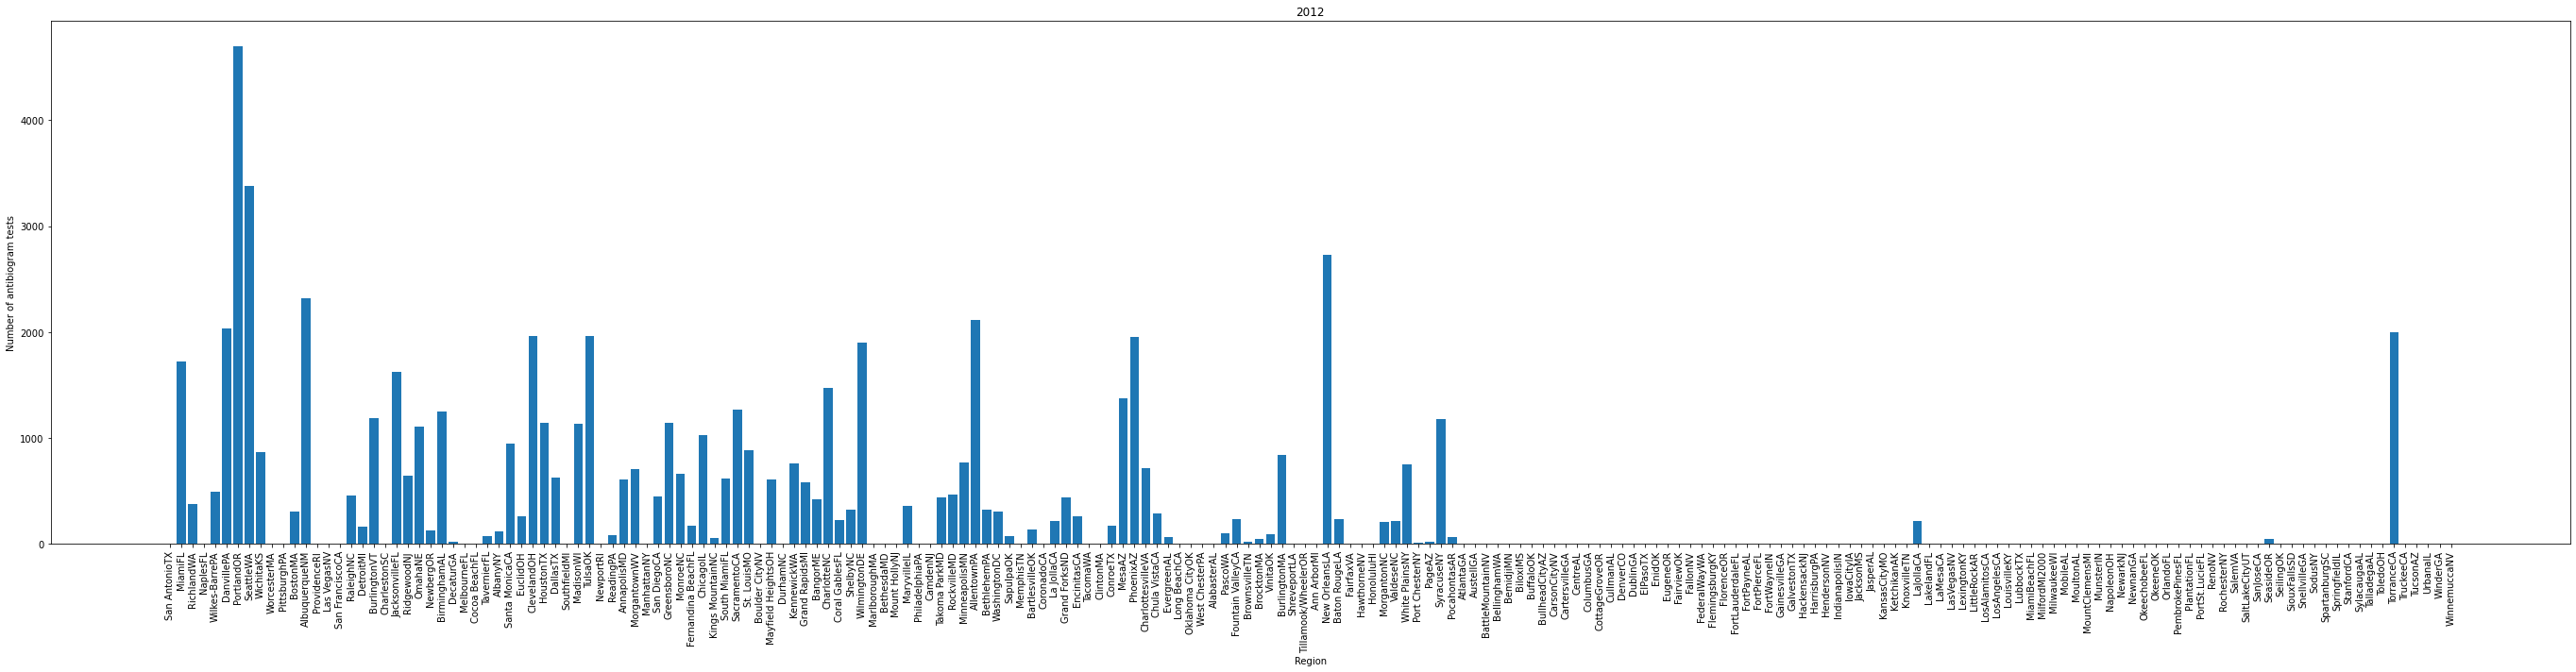

In [88]:
plotCountByRegion("2012")